In [34]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import datasets

In [3]:
iris = datasets.load_iris()

X = iris.data
y = iris.target

X = X[y < 2, :2]
y = y[y < 2]

standard = StandardScaler().fit(X)
X_standard = standard.transform(X)
# X_train, X_test, y_train, y_test = train_test_split(X_standard, y)

In [4]:
from sklearn.svm import LinearSVC

In [5]:
svc = LinearSVC(C=1e9).fit(X_standard, y)
# svc.score(X_test, y_test)

In [6]:
def plot_decision_boundary(model, axis):
    # meshgrid函数用两个坐标轴上的点在平面上画格，返回坐标矩阵
    X0, X1 = np.meshgrid(
        # 随机两组数，起始值和密度由坐标轴的起始值决定
        np.linspace(axis[0], axis[1], int((axis[1] - axis[0]) * 100)).reshape(-1, 1),
        np.linspace(axis[2], axis[3], int((axis[3] - axis[2]) * 100)).reshape(-1, 1),
    )
    # ravel()方法将高维数组降为一维数组，c_[]将两个数组以列的形式拼接起来，形成矩阵
    X_grid_matrix = np.c_[X0.ravel(), X1.ravel()]
    # 通过训练好的逻辑回归模型，预测平面上这些点的分类
    y_predict = model.predict(X_grid_matrix)
    y_predict_matrix = y_predict.reshape(X0.shape)
    
    # 设置色彩表
    from matplotlib.colors import ListedColormap
    my_colormap = ListedColormap(['#EF9A9A', '#FFF59D', '#90CAF9'])
    
    # 绘制等高线，并且填充等高区域的颜色
    plt.contourf(X0, X1, y_predict_matrix, cmap=my_colormap)

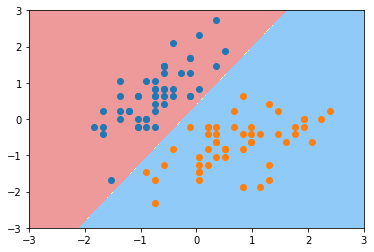

In [7]:
plot_decision_boundary(svc, axis=[-3, 3, -3, 3])
plt.scatter(X_standard[y==0, 0], X_standard[y==0, 1])
plt.scatter(X_standard[y==1, 0], X_standard[y==1, 1])

In [8]:
svc = LinearSVC(C=1e-9).fit(X_standard, y)

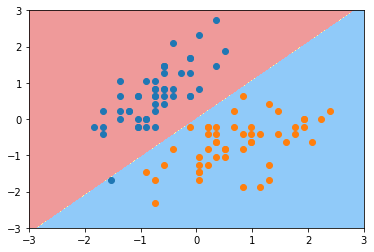

In [9]:
plot_decision_boundary(svc, axis=[-3, 3, -3, 3])
plt.scatter(X_standard[y==0, 0], X_standard[y==0, 1])
plt.scatter(X_standard[y==1, 0], X_standard[y==1, 1])

In [10]:
# 构造一个绘制决策边界和上下支撑向量直线的方法
def plot_svc_decision_boundary(model, axis):
    # 因为SVM可以解决多分类问题，所以特征系数和截距都是数组，在二分类问题下取第0个元素
    w = model.coef_[0]
    d = model.intercept_[0]

    # 构建200个在axis范围内的，有线性关系的点，既构建x0
    plot_x = np.linspace(axis[0], axis[1], 200)

    # 根据上面转换的公式，求出x1
    y = - (w[0] * plot_x)/w[1] - d / w[1]
    up_y = - (w[0] * plot_x)/w[1] - d / w[1] + 1 / w[1]
    down_y = - (w[0] * plot_x)/w[1] - d / w[1] - 1 / w[1]

    # 对y轴的上下边界作以限制
    y_index = (y >= axis[2]) & (y <= axis[3])
    up_y_index = (up_y >= axis[2]) & (up_y <= axis[3])
    down_y_index = (down_y >= axis[2]) & (down_y <= axis[3])

    plt.plot(plot_x[y_index], y[y_index], color='black')
    plt.plot(plot_x[up_y_index], up_y[up_y_index], color='black')
    plt.plot(plot_x[down_y_index], down_y[down_y_index], color='black')

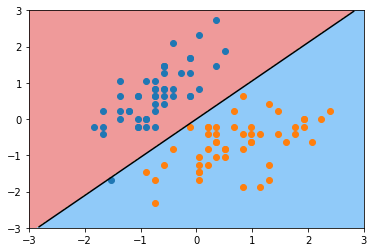

In [11]:
plot_decision_boundary(svc, axis=[-3, 3, -3, 3])
plot_svc_decision_boundary(svc, axis=[-3, 3, -3, 3])
plt.scatter(X_standard[y == 0, 0], X_standard[y == 0, 1])
plt.scatter(X_standard[y == 1, 0], X_standard[y == 1, 1])

## 非线性svm

In [12]:
# 使用datasets提供的方法构建非线性数据
X, y = datasets.make_moons()

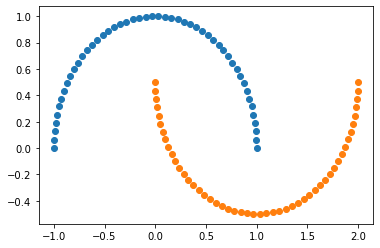

In [13]:
plt.scatter(X[y==0, 0], X[y==0, 1])
plt.scatter(X[y==1, 0], X[y==1, 1])

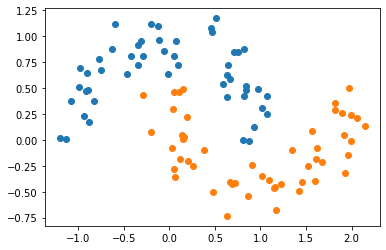

In [14]:
X, y = datasets.make_moons(noise=0.15)

plt.scatter(X[y==0, 0], X[y==0, 1])
plt.scatter(X[y==1, 0], X[y==1, 1])

In [15]:
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.svm import LinearSVC
from sklearn.pipeline import Pipeline

In [16]:
def PolynomialSVC(degree, C=1.0):
    return Pipeline([
        ("poly", PolynomialFeatures(degree=degree)),
        ("std_scaler", StandardScaler()),
        ("linearSVC", LinearSVC(C=C))
])

In [17]:
# 使用多项式SVM训练样本数据
ploy_svc = PolynomialSVC(degree=3)
ploy_svc.fit(X, y)

Pipeline(memory=None,
         steps=[('poly',
                 PolynomialFeatures(degree=3, include_bias=True,
                                    interaction_only=False, order='C')),
                ('std_scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('linearSVC',
                 LinearSVC(C=1.0, class_weight=None, dual=True,
                           fit_intercept=True, intercept_scaling=1,
                           loss='squared_hinge', max_iter=1000,
                           multi_class='ovr', penalty='l2', random_state=None,
                           tol=0.0001, verbose=0))],
         verbose=False)

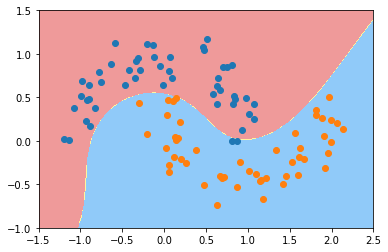

In [18]:
plot_decision_boundary(ploy_svc, axis=[-1.5, 2.5, -1.0, 1.5])
plt.scatter(X[y==0, 0], X[y==0, 1])
plt.scatter(X[y==1, 0], X[y==1, 1])

## 多项式核函数的SVM

In [19]:
from sklearn.svm import SVC

In [20]:
def PolynomailKernelSVC(degree, C=1):
    return Pipeline([
        ("std_scaler", StandardScaler()),
        ("kernelSVC", SVC(kernel="poly", degree=degree, C=C)) # 
    ])

In [32]:
poly_kernel_svc = PolynomailKernelSVC(degree=3, C=1)
poly_kernel_svc.fit(X, y)

Pipeline(memory=None,
         steps=[('std_scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('kernelSVC',
                 SVC(C=1, break_ties=False, cache_size=200, class_weight=None,
                     coef0=0.0, decision_function_shape='ovr', degree=3,
                     gamma='scale', kernel='poly', max_iter=-1,
                     probability=False, random_state=None, shrinking=True,
                     tol=0.001, verbose=False))],
         verbose=False)

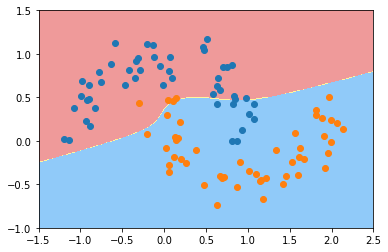

In [35]:
plot_decision_boundary(poly_kernel_svc, axis=[-1.5, 2.5, -1.0, 1.5])
plt.scatter(X[y==0, 0], X[y==0, 1])
plt.scatter(X[y==1, 0], X[y==1, 1])

## 高斯核函数

In [38]:
x = np.arange(-4, 5, 1)
y = np.array((x >= -2) & (x <= 2), dtype='int')
x, y

(array([-4, -3, -2, -1,  0,  1,  2,  3,  4]),
 array([0, 0, 1, 1, 1, 1, 1, 0, 0]))

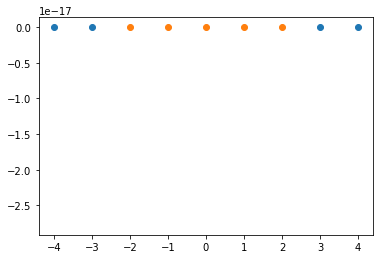

In [39]:
plt.scatter(x[y==0], [0]*len(x[y==0]))
plt.scatter(x[y==1], [0]*len(x[y==1]))

In [40]:
def gaussian(x, l):
    # 这一节对gamma先不做探讨，先定为1
    gamma = 1.0

    # 这里x-l是一个数，不是向量，所以不需要取模
    return np.exp(-gamma * (x - l)**2)

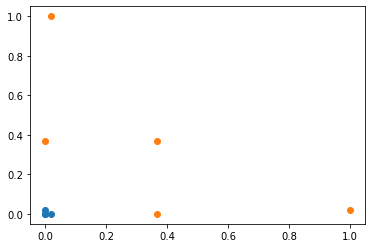

In [41]:
# 将每一个x值通过高斯核函数和l1，l2地标转换为2个值，构建成新的样本数据
l1, l2 = -1, 1

X_new = np.empty((len(x), 2))
for i, data in enumerate(x):
    X_new[i, 0] = gaussian(data, l1)
    X_new[i, 1] = gaussian(data, l2)

# 绘制新的样本点
plt.scatter(X_new[y==0, 0], X_new[y==0, 1])
plt.scatter(X_new[y==1, 0], X_new[y==1, 1])

## Scikit Learn中的RBF SVM

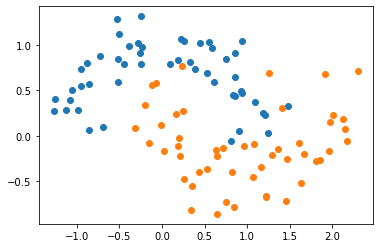

In [43]:
X, y = datasets.make_moons(noise=0.2, random_state=666)

plt.scatter(X[y==0, 0], X[y==0, 1])
plt.scatter(X[y==1, 0], X[y==1, 1])

In [44]:
def RBFKernelSVC(gamma = 1.0):
    return Pipeline([
        ("std_scaler", StandardScaler()),
        ("svc", SVC(kernel="rbf", gamma=gamma)) # 高斯核
    ])

rbf_svc = RBFKernelSVC(gamma=1)
rbf_svc.fit(X, y)

Pipeline(memory=None,
         steps=[('std_scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('svc',
                 SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None,
                     coef0=0.0, decision_function_shape='ovr', degree=3,
                     gamma=1, kernel='rbf', max_iter=-1, probability=False,
                     random_state=None, shrinking=True, tol=0.001,
                     verbose=False))],
         verbose=False)

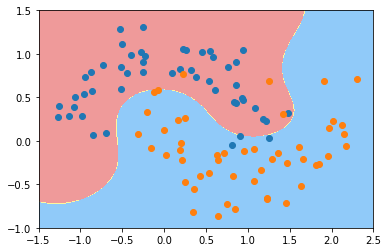

In [45]:
plot_decision_boundary(rbf_svc, axis=[-1.5, 2.5, -1.0, 1.5])
plt.scatter(X[y==0, 0], X[y==0, 1])
plt.scatter(X[y==1, 0], X[y==1, 1])

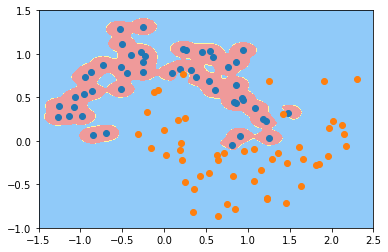

In [46]:
# 将gamma取100
rbf_svc100 = RBFKernelSVC(gamma=100)
rbf_svc100.fit(X, y)

plot_decision_boundary(rbf_svc100, axis=[-1.5, 2.5, -1.0, 1.5])
plt.scatter(X[y==0, 0], X[y==0, 1])
plt.scatter(X[y==1, 0], X[y==1, 1])

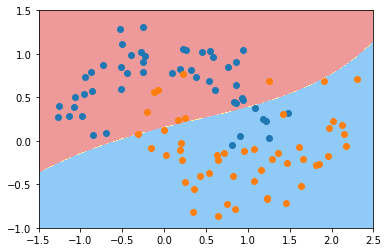

In [47]:
rbf_svc01 = RBFKernelSVC(gamma=0.1)
rbf_svc01.fit(X, y)

plot_decision_boundary(rbf_svc01, axis=[-1.5, 2.5, -1.0, 1.5])
plt.scatter(X[y==0, 0], X[y==0, 1])
plt.scatter(X[y==1, 0], X[y==1, 1])

## SVM解决Regression

In [48]:
boston = datasets.load_boston()
X = boston.data
y = boston.target

# standard = StandardScaler().fit(X)
# X = standard.transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y)

In [49]:
from sklearn.svm import SVR

In [50]:
def StandardSVR(epsilon = 0.1):
    return Pipeline([
        ("std_scaler", StandardScaler()),
        ("svr", SVR(kernel="rbf", epsilon=epsilon)) # 高斯核
    ])

In [51]:
svr = StandardSVR().fit(X_train, y_train)

In [52]:
svr.score(X_test, y_test)

0.6211439417904738